In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import verde as vd
from flowline import flowline, linear_interp

In [2]:
ds = xr.load_dataset(Path('data/glacier_velocity.nc'))
ds

<xarray.Dataset> Size: 7MB
Dimensions:       (x: 400, y: 400)
Coordinates:
  * x             (x) float64 3kB -1.62e+06 -1.619e+06 ... -1.441e+06 -1.44e+06
  * y             (y) float64 3kB -5.201e+05 -5.206e+05 ... -6.996e+05
    lat           (y, x) float64 1MB -74.44 -74.44 -74.44 ... -75.34 -75.34
    lon           (y, x) float64 1MB 252.2 252.2 252.2 ... 244.1 244.1 244.1
Data variables:
    coord_system  |S1 1B b''
    VX            (y, x) float32 640kB nan nan nan nan ... 0.08497 -1.125 -2.183
    VY            (y, x) float32 640kB nan nan nan nan ... 50.78 50.3 47.87 45.6
    STDX          (y, x) float32 640kB nan nan nan nan ... 6.968 6.994 7.127
    STDY          (y, x) float32 640kB nan nan nan nan ... 6.908 5.896 5.925
    ERRX          (y, x) float32 640kB nan nan nan nan ... 1.011 1.004 1.036
    ERRY          (y, x) float32 640kB nan nan nan nan ... 0.9975 0.8428 0.856
    CNT           (y, x) int32 640kB 0 0 0 0 0 0 0 0 ... 44 40 43 45 44 48 49 48
    SOURCE        (y, x) int8 160kB 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        v_mix.v8Jul2019.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs
    creator_name:              J. Mouginot
    comment:                    
    license:                   No restrictions on access or use.

In [3]:
vmag = np.sqrt(ds.VX.values**2 + ds.VY.values**2)

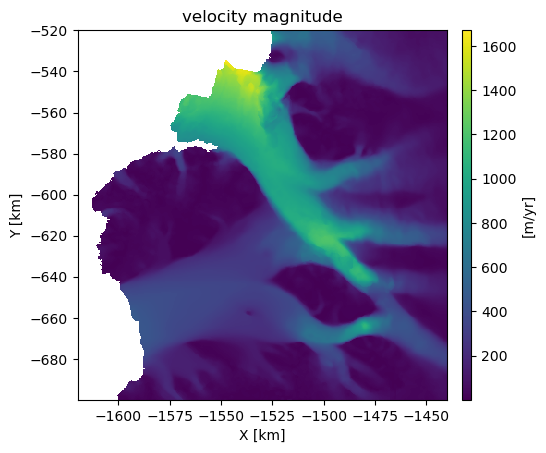

In [4]:
plt.pcolormesh(ds.x/1000, ds.y/1000, vmag)
plt.axis('scaled')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.title('velocity magnitude')
plt.colorbar(pad=0.03, aspect=40, label='[m/yr]')
plt.show()

In [5]:
x0 = -1.5e6
y0 = -0.675e6

vx = ds.VX.values
vy = ds.VY.values

xx, yy = np.meshgrid(ds.x.values, ds.y.values)

vx1, vy1 = linear_interp(xx, yy, vx, vy, x0, y0, 10e3)
vx1, vy1

(array(-312.79114787), array(260.97581312))

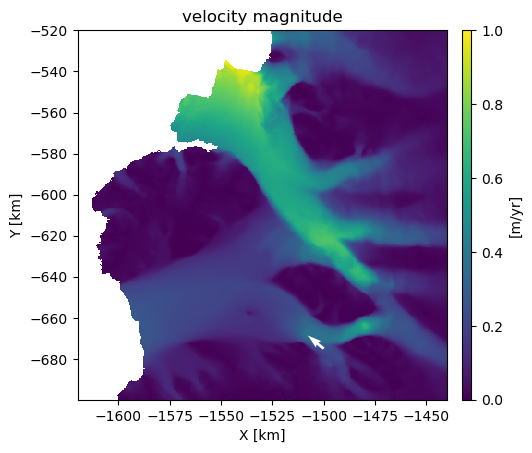

In [6]:
plt.pcolormesh(ds.x/1000, ds.y/1000, vmag)
plt.quiver(x0/1000, y0/1000, vx1, vy1, color='white')
plt.axis('scaled')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.title('velocity magnitude')
plt.colorbar(pad=0.03, aspect=40, label='[m/yr]')
plt.show()

In [7]:
flow_time, dists = flowline(xx, yy, vx, vy, x0, y0, stride=10, mode='time', total_dist=100e3, maxdist=5e3)
print(f'{flow_time.shape[0]} points')

flow_dist, dists = flowline(xx, yy, vx, vy, x0, y0, stride=3e3, mode='distance', total_dist=90e3, maxdist=5e3)
print(f'{flow_dist.shape[0]} points')

30 points
32 points


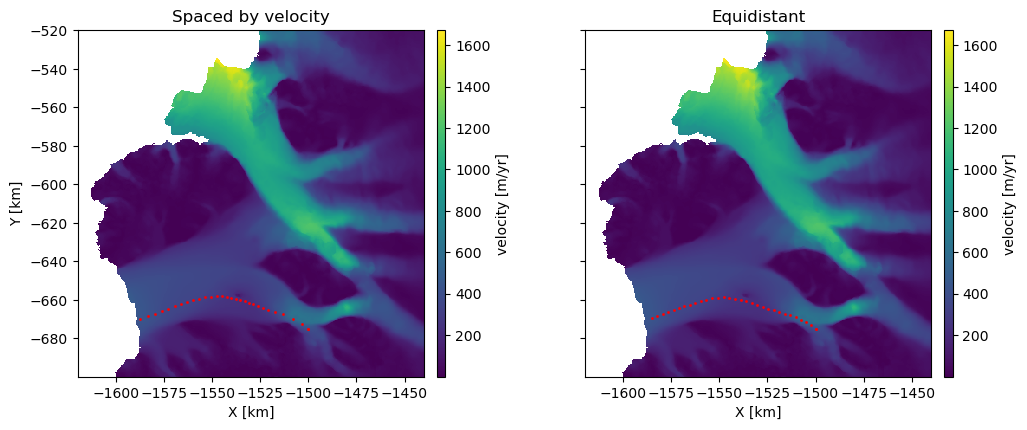

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,4.5), sharey=True)
ax = axs[0]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_time[:,0]/1000, flow_time[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_title('Spaced by velocity')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')

ax = axs[1]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_dist[:,0]/1000, flow_dist[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_title('Equidistant')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')
plt.show()

In [9]:
x0 = -1.47e6
y0 = -0.65e6

flow_time, dists = flowline(xx, yy, vx, vy, x0, y0, stride=10, mode='time', total_dist=150e3, maxdist=5e3)
print(f'{flow_time.shape[0]} points')

flow_dist, dists = flowline(xx, yy, vx, vy, x0, y0, stride=2e3, mode='distance', total_dist=150e3, maxdist=5e3)
print(f'{flow_dist.shape[0]} points')

35 points
71 points


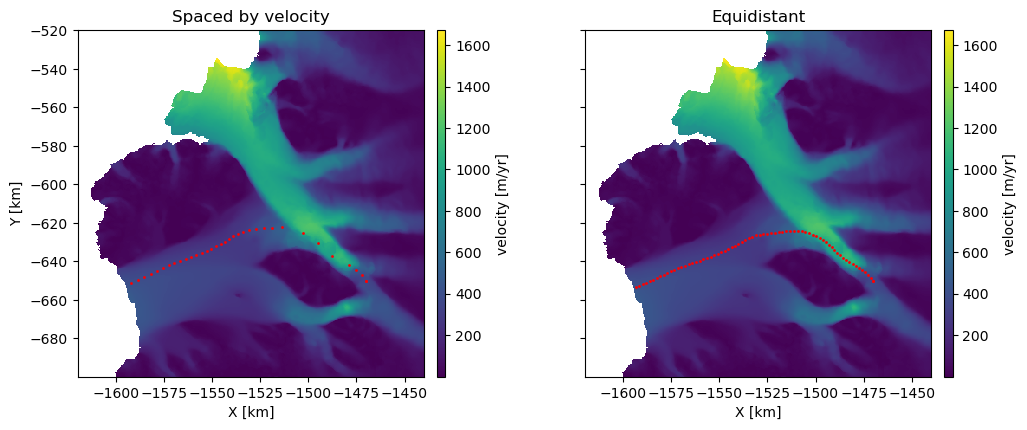

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12,4.5), sharey=True)
ax = axs[0]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_time[:,0]/1000, flow_time[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_title('Spaced by velocity')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')

ax = axs[1]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_dist[:,0]/1000, flow_dist[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_title('Equidistant')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')
plt.show()

In [11]:
x0 = -1.49e6
y0 = -0.615e6

flow_time, dists = flowline(xx, yy, vx, vy, x0, y0, stride=2, mode='time', total_dist=150e3, maxdist=5e3)
print(f'{flow_time.shape[0]} points')

flow_dist, dists = flowline(xx, yy, vx, vy, x0, y0, stride=2e3, mode='distance', total_dist=150e3, maxdist=5e3)
print(f'{flow_dist.shape[0]} points')

53 points
53 points


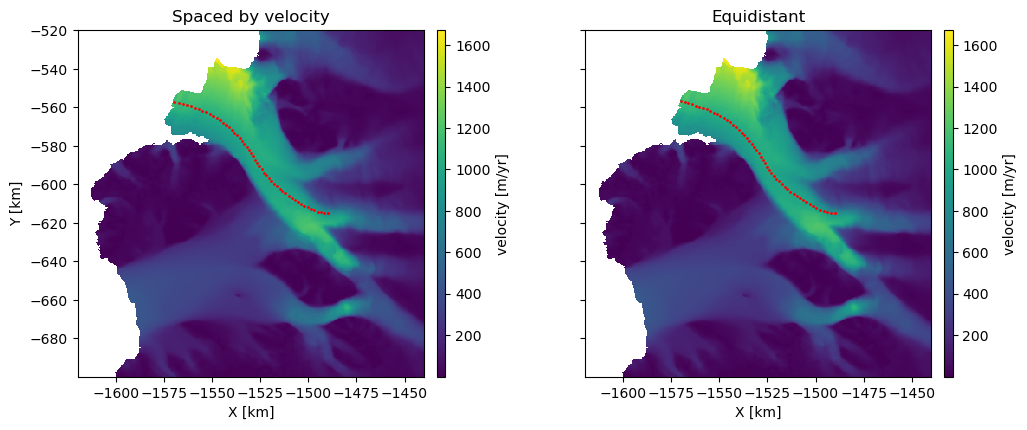

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12,4.5), sharey=True)
ax = axs[0]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_time[:,0]/1000, flow_time[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_title('Spaced by velocity')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')

ax = axs[1]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_dist[:,0]/1000, flow_dist[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_title('Equidistant')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')
plt.show()

## Backwards

In [13]:
flow_dist_forward, dists_forward = flowline(xx, yy, vx, vy, x0, y0, stride=2e3, mode='distance', total_dist=150e3, maxdist=5e3)
print(f'{flow_dist.shape[0]} points')

flow_dist_backward, dists_backward = flowline(xx, yy, vx, vy, x0, y0, stride=2e3, mode='distance', direction='backward', total_dist=50e3, maxdist=5e3)
print(f'{flow_dist.shape[0]} points')

53 points
53 points


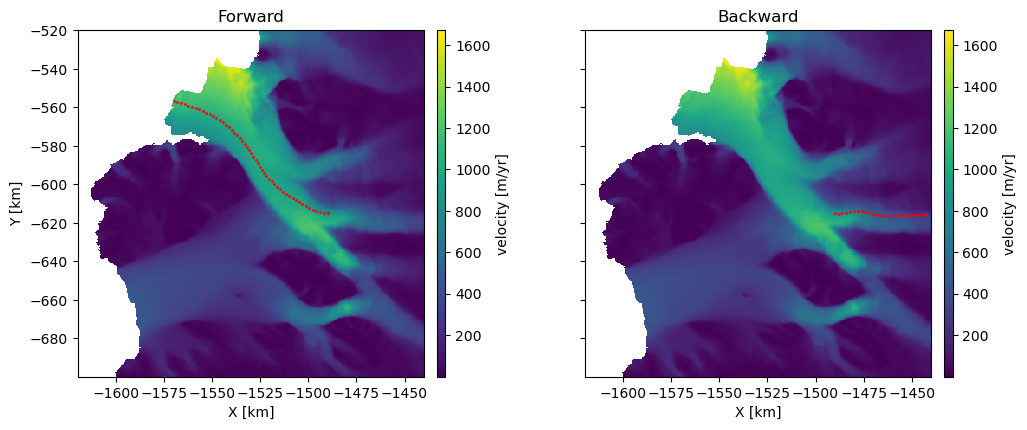

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12,4.5), sharey=True)
ax = axs[0]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_dist_forward[:,0]/1000, flow_dist_forward[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_title('Forward')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')

ax = axs[1]
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_dist_backward[:,0]/1000, flow_dist_backward[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_title('Backward')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')
plt.show()

In [15]:
flow_combined = np.concatenate([flow_dist_backward[::-1,:], flow_dist_forward])
dists_combined = np.concatenate([dists_backward, dists_forward+np.max(dists_backward)])
flow_combined.shape

(79, 2)

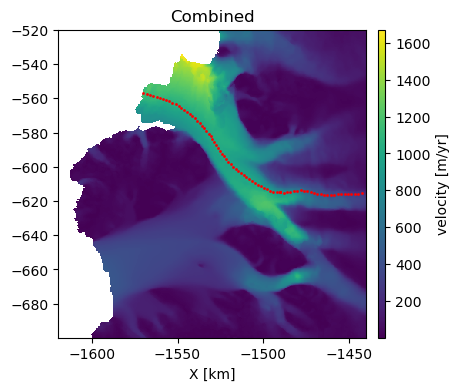

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
im = ax.pcolormesh(ds.x/1000, ds.y/1000, vmag)
ax.plot(flow_combined[:,0]/1000, flow_combined[:,1]/1000, 'ro', markersize=1)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_title('Combined')
plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')
plt.show()

# Use case: glacier profiles/cross sections

In [17]:
bm = xr.load_dataset(Path('data/bedmachine.nc'))
bm

<xarray.Dataset> Size: 3MB
Dimensions:    (x: 359, y: 359)
Coordinates:
  * x          (x) int32 1kB -1619500 -1619000 -1618500 ... -1441000 -1440500
  * y          (y) int32 1kB -520500 -521000 -521500 ... -698500 -699000 -699500
Data variables:
    mapping    |S1 1B b''
    mask       (y, x) int8 129kB 0 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2 2
    firn       (y, x) float32 516kB 0.0 0.0 0.0 0.0 ... 28.42 28.35 28.28 28.22
    surface    (y, x) float32 516kB 0.0 0.0 0.0 0.0 ... 944.0 942.4 942.2 943.2
    thickness  (y, x) float32 516kB 0.0 0.0 0.0 ... 1.092e+03 1.137e+03
    bed        (y, x) float32 516kB -483.2 -506.8 -708.1 ... -149.7 -193.5
    errbed     (y, x) float32 516kB 100.0 100.0 100.0 100.0 ... 50.0 40.0 38.0
    source     (y, x) int8 129kB 10 10 6 6 6 6 6 6 6 6 6 ... 5 5 5 5 5 5 5 5 5 5
    dataid     (y, x) int8 129kB 10 10 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    geoid      (y, x) int16 258kB -29 -29 -29 -29 -29 ... -32 -32 -32 -32 -32
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     03-Jun-2022 (v3.4)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

In [18]:
from scipy.interpolate import griddata

def bedmachine_profile(bm, pred_coords):
    xx, yy = np.meshgrid(bm.x.values, bm.y.values)
    
    coordinates = np.array([xx.flatten(), yy.flatten()]).T
    
    # use data within 10 km of profile for interpolation
    dist_msk = vd.distance_mask((pred_coords[:,0], pred_coords[:,1]), 10e3, (xx.flatten(), yy.flatten()))
    coordinates = coordinates[dist_msk,:]
    
    bed_profile = griddata(coordinates, bm.bed.values.flatten()[dist_msk], pred_coords)
    surf_profile = griddata(coordinates, bm.surface.values.flatten()[dist_msk], pred_coords)
    thick_profile = griddata(coordinates, bm.thickness.values.flatten()[dist_msk], pred_coords)

    return bed_profile, surf_profile, thick_profile

In [19]:
flow_dist_forward, dists = flowline(xx, yy, vx, vy, x0, y0, stride=100, mode='distance', total_dist=150e3, maxdist=5e3)
print(f'{flow_dist_forward.shape[0]} points')

bed_profile, surf_profile, thick_profile = bedmachine_profile(bm, flow_dist_forward[::-1,:])

1001 points


In [20]:
bed_profile.shape

(1001,)

In [21]:
dists /= 1000

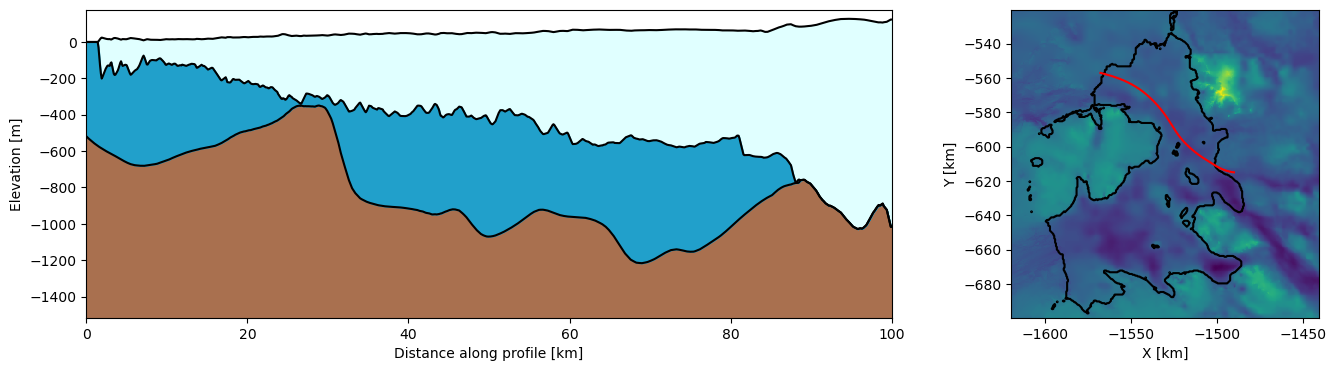

In [22]:
water_color = '#21a0cb'
ice_color = 'lightcyan'
rock_color = '#a9704f'

fig, axs = plt.subplots(1, 2, figsize=(16,4), gridspec_kw=dict(width_ratios=[1, 0.4]))
ax = axs[0]
ax.fill_between(dists, surf_profile-thick_profile, surf_profile, color=ice_color, rasterized=True)
ax.fill_between(dists, np.full(len(dists), np.min(bed_profile))-300, bed_profile, color=rock_color, rasterized=True)
ax.fill_between(dists, bed_profile, surf_profile-thick_profile, color=water_color, rasterized=True)
ax.plot(dists, surf_profile, c='k')
ax.plot(dists, surf_profile-thick_profile, c='k')
ax.plot(dists, bed_profile, c='k')
ax.set_xlim(0, dists[-1])
ax.set_ylim(np.min(bed_profile)-300, np.max(surf_profile)+50)
ax.set_xlabel('Distance along profile [km]')
ax.set_ylabel('Elevation [m]')

ax = axs[1]
ax.pcolormesh(bm.x/1000, bm.y/1000, bm.bed)
ax.contour(bm.x/1000, bm.y/1000, bm.mask==3, levels=[0.5], colors=['k'])
ax.plot(flow_dist_forward[:,0]/1000, flow_dist_forward[:,1]/1000, 'r-')
ax.axis('scaled')
ax.set_ylabel('Y [km]')
ax.set_xlabel('X [km]')
plt.show()

In [52]:
flow_dist_forward, dists_forward = flowline(xx, yy, vx, vy, x0, y0, stride=100, mode='distance', total_dist=150e3, maxdist=5e3)
print(f'{flow_dist_forward.shape[0]} points')

flow_dist_backward, dists_backward = flowline(xx, yy, vx, vy, x0, y0, stride=100, mode='distance', direction='backward', total_dist=50e3, maxdist=5e3)
print(f'{flow_dist_backward.shape[0]} points')

1001 points
501 points


In [53]:
flow_combined = np.concatenate([flow_dist_backward[::-1,:], flow_dist_forward])
dists_combined = np.concatenate([dists_backward, dists_forward+np.max(dists_backward)])
flow_combined.shape

(1502, 2)

In [54]:
bed_profile, surf_profile, thick_profile = bedmachine_profile(bm, flow_combined[::-1,:])

In [55]:
dists_combined /= 1000

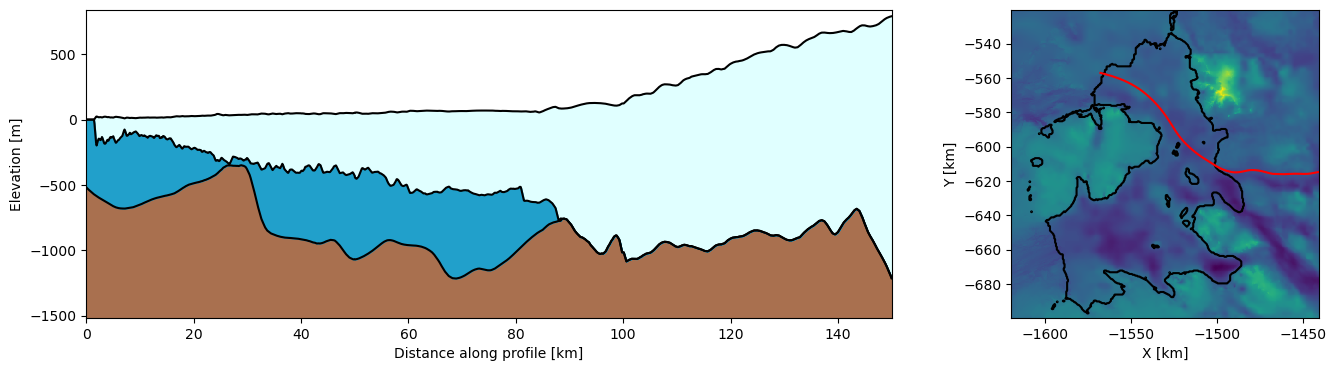

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(16,4), gridspec_kw=dict(width_ratios=[1, 0.4]))
ax = axs[0]
ax.fill_between(dists_combined, surf_profile-thick_profile, surf_profile, color=ice_color, rasterized=True)
ax.fill_between(dists_combined, np.full(len(dists_combined), np.min(bed_profile))-300, bed_profile, color=rock_color, rasterized=True)
ax.fill_between(dists_combined, bed_profile, surf_profile-thick_profile, color=water_color, rasterized=True)
ax.plot(dists_combined, surf_profile, c='k')
ax.plot(dists_combined, surf_profile-thick_profile, c='k')
ax.plot(dists_combined, bed_profile, c='k')
ax.set_xlim(0, dists_combined[-1])
ax.set_ylim(np.min(bed_profile)-300, np.max(surf_profile)+50)
ax.set_xlabel('Distance along profile [km]')
ax.set_ylabel('Elevation [m]')

ax = axs[1]
ax.pcolormesh(bm.x/1000, bm.y/1000, bm.bed)
ax.contour(bm.x/1000, bm.y/1000, bm.mask==3, levels=[0.5], colors=['k'])
ax.plot(flow_combined[:,0]/1000, flow_combined[:,1]/1000, 'r-')
ax.axis('scaled')
ax.set_ylabel('Y [km]')
ax.set_xlabel('X [km]')
plt.savefig(Path('figures/cross_section.png'), dpi=300)
plt.show()

# Interactive plot to get coordinates

You may need to install *ipympl*

If you get an MPLCanvasModel error try turning off your adblocker if you have one and refresh the page.

**Click to save coordinates** Note these coordintes are in km

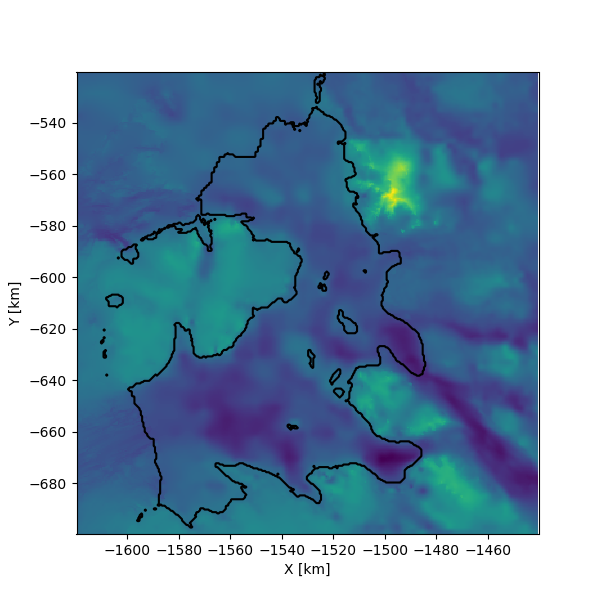

In [40]:
%matplotlib widget

plt.ioff()
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.pcolormesh(bm.x/1000, bm.y/1000, bm.bed)
ax.contour(bm.x/1000, bm.y/1000, bm.mask==3, levels=[0.5], colors=['k'])
ax.axis('scaled')
ax.set_ylabel('Y [km]')
ax.set_xlabel('X [km]')
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ax.plot(event.xdata, event.ydata, 'ro', markersize=4)
    fig.canvas.draw()
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

In [42]:
plt.close()

In [43]:
pos

[[np.float64(-1527.409804505187), np.float64(-683.5548516971209)],
 [np.float64(-1494.3849127302951), np.float64(-677.3384014806705)],
 [np.float64(-1487.0028780982605), np.float64(-666.8481417404108)],
 [np.float64(-1484.6717092670917), np.float64(-637.3200032122724)],
 [np.float64(-1480.3978997432823), np.float64(-614.3968430391121)],
 [np.float64(-1488.9455187909011), np.float64(-587.1998733421425)],
 [np.float64(-1532.849198444581), np.float64(-612.8427304849996)],
 [np.float64(-1507.2063413017238), np.float64(-596.5245486668177)]]

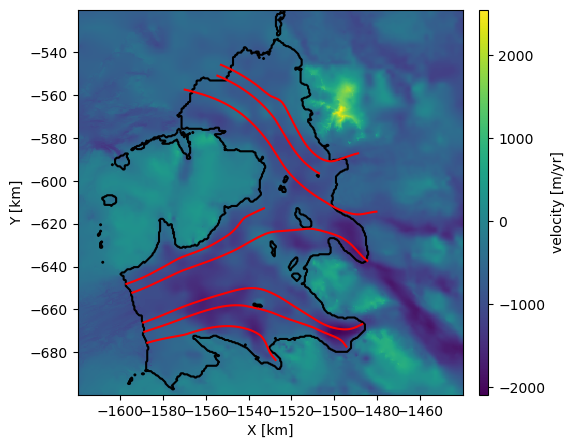

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
im = ax.pcolormesh(bm.x/1000, bm.y/1000, bm.bed)
ax.contour(bm.x/1000, bm.y/1000, bm.mask==3, levels=[0.5], colors=['k'])
ax.axis('scaled')
ax.set_ylabel('Y [km]')
ax.set_xlabel('X [km]')
for p in pos:
    flow_dist, dists = flowline(xx, yy, vx, vy, p[0]*1000, p[1]*1000, stride=500, mode='distance', total_dist=150e3, maxdist=5e3)
    ax.plot(flow_dist[:,0]/1000, flow_dist[:,1]/1000, 'r-')

plt.colorbar(im, ax=ax, pad=0.03, aspect=40, label='velocity [m/yr]')
plt.savefig(Path('figures/multiple_flowlines.png'), dpi=300)
plt.show()